# A Larger Dataset from Scratch

Created by Dr. Jie Tao, ver. 0.1

## What you need to know in this part
We are putting things together we learned in this course, and some other courses together. Specifically, these knowledge elements include:
- Pandas 
    - DataFrame Operations
    - Plotting
- Markdown
    - Express your analytical ideas
    - Explain your analysis
- Basic Descriptive Analysis from QA500
- Analytics Pipeline from BA500

## What you can do in this part
After completing this part, you should be able to:
- Create and lay out a new Jupyter Notebook
- Collaborate with your peers using Git/Github
- Use Pandas to load and manipulate a large dataset
- Use Dataframe operations to analyze the data
- Use Pandas plotting to plot key statistics

## Step 0: Work with Your Final Group 
Consider this part as the final tryout for the final projects, in a __much smaller__ scale. You should work with the same group of people as the final project.

## Step 1: Study Your Data
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Here is a data dictionary you can use to understand your data, which is available [here](https://www.kaggle.com/c/titanic/data) as well.

| Feature Name | Definition | Key |
| ------------ | ---------- | --- |
| survival | _Passenger survived or not_ | __0 = No, 1 = Yes__ |
| pclass | _Ticket Class_ | __1 = 1st, 2 = 2nd, 3 = 3rd__ |
| name | _Name of the passenger_ | ... | 
| sex | _Gender of the passenger_ | __male, female__ |
| age | _Age in Years_ | ... |
| sibsp | _# of siblings / spouses aboard the Titanic_ | ... |
| parch | _# of parents / children aboard the Titanic_ | ... |
| ticket | _Ticket number_ | ... |
| fare | _Passenger fare paid_ | ... |
| cabin | _Cabin number_ | ... |
| embarked | _Port of Embarkation_ | __C = Cherbourg, Q = Queenstown, S = Southampton__ |

There are some additional notes for these variables that maybe helpful:

- __pclass__: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- __age__: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

- __sibsp__: This feature defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- __parch__: This feature defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

### YOUR TURN HERE
Write a short paragraph here to explain how do you plan to use the data. Specifically, you need to come up with at least 2 _interesting_ __analytical questions__. Also, include a _third_ analytical question for __next steps__ (things you can not do now but plan to do in the future, maybe due to the limitations of time/data/technique). Do not forget mention __how other people should care about your analysis__.

Here are some example questions:
1. Do wemen have a better chance to survive?
2. Do 1st-class passengers have a better chance to survive?

Please do not use these questions directly, come up with something new.

__NOTE:__ you should follow the same structure for your final project.

__Your Analytical Questions below: __


Secondly, the `titanic.csv` file contains all the data you need to use. Let's first load the data in. The DataFrame holding the data should be named as `source_data`.

In [4]:
# DO NOT CHANGE THIS CODE BLOCK
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### Load the Data
Hint - you may want to set `PassengerId` as the index of the DataFrame, you can do above by using the `index_col=` argument in `pd.read_csv`.

In [5]:
## Write your code to load the data
titanic = pd.read_csv('./titanic.csv', index_col = 'PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Take the first look at your data

After loading your data, it is most important to see if the data is loaded as expected, you should at least look at _a few rows_ in `source_data`.

In [6]:
## write your code here
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You should also check how much data are your playing with, in terms of how many instances (rows) and features (columns).

In [7]:
## write your code here
titanic.shape

(891, 11)

### Determining how much data is missing
The next step is to check how much data is missing - maybe show them in ratio?

In [8]:
## Write your code here
titanic.isna().sum()/titanic.shape[0]*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

If a column/feature contains more than __50%__ missing, we will drop it in this analysis.

In [9]:
## write your code here
titanic_modified = titanic.copy()
titanic_modified=titanic.dropna(thresh=len(titanic) /2 , axis=1)
titanic_modified.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

If a column contains less that __50%__ missing, you shoud consider impute it.
- If the feature is __continuous__, you should consider using the _mean/median_;
- If it is __categorical__, you shoud consider using the _mode_.

Create new columns for imputed features. For instance, if the original feature is named `x`, your imputed feature should be `x_imputed`.

In [10]:
## write your code here
titanic_modified['Age_imputed']=titanic_modified['Age'].fillna(titanic_modified['Age'].mean())
titanic_modified
titanic_modified.isna().sum()/titanic_modified.shape[0]*100

Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
Age_imputed     0.000000
dtype: float64

In [11]:
titanic_modified['Embarked_imputed']=titanic_modified['Embarked'].fillna(titanic_modified['Embarked'].mode()[0])
titanic_modified.isna().sum()


Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Embarked              2
Age_imputed           0
Embarked_imputed      0
dtype: int64

### Check your data types
You should always check the data types after loading the data. First, check the data types (you can use `.dtypes` or `.info()`.

In [12]:
## Write your code here
titanic_modified.dtypes
titanic_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived            891 non-null int64
Pclass              891 non-null int64
Name                891 non-null object
Sex                 891 non-null object
Age                 714 non-null float64
SibSp               891 non-null int64
Parch               891 non-null int64
Ticket              891 non-null object
Fare                891 non-null float64
Embarked            889 non-null object
Age_imputed         891 non-null float64
Embarked_imputed    891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


If you see anything not correct above, you should fix it below. Otherwise, write a comment to yourself stating __all data types are correct__.

In [13]:
## Write your code here
titanic_modified['Pclass'] = titanic_modified['Pclass'].astype('category')
titanic_modified['Sex'] = titanic_modified['Sex'].astype('category')
titanic_modified['Survived'] = titanic_modified['Survived'].astype('category')
titanic_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived            891 non-null category
Pclass              891 non-null category
Name                891 non-null object
Sex                 891 non-null category
Age                 714 non-null float64
SibSp               891 non-null int64
Parch               891 non-null int64
Ticket              891 non-null object
Fare                891 non-null float64
Embarked            889 non-null object
Age_imputed         891 non-null float64
Embarked_imputed    891 non-null object
dtypes: category(3), float64(3), int64(2), object(4)
memory usage: 72.5+ KB


## Step 2: Descriptive Stats

No matter what analytical questions you try to develop/answer, there are some basic statistical questions you need to answer. 

These descriptive statistical analysis can help you gain more insights about your data, to further/tweak your main analytical questions.

### Overall descriptive Stats

For any DataFrame, we should consider look at the generic descriptive statistics, such as _mean_, _median_, _# of unique values_, _standard deviation_, ...

`Pandas` provides a method for that.

In [14]:
## Write your code here
titanic_modified.describe()

,Age,SibSp,Parch,Fare,Age_imputed
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,29.699118
std,14.526497,1.102743,0.806057,49.693429,13.002015
min,0.420000,0.000000,0.000000,0.000000,0.420000
25%,20.125000,0.000000,0.000000,7.910400,22.000000
50%,28.000000,0.000000,0.000000,14.454200,29.699118
75%,38.000000,1.000000,0.000000,31.000000,35.000000
max,80.000000,8.000000,6.000000,512.329200,80.000000


### How many survived?

First thing you may want to know is how many have survived, maybe through a bar chart comparison?

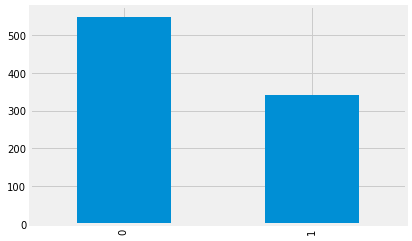

In [15]:
## Write your code here
titanic_modified['Survived'].value_counts().sort_index().plot(kind='bar')

### Answer the question:

__What can you learn from above figure?__ Write your answer below:



### How many male vs. female?
Gender (`sex`) is another important feature to group your instances. You may want to check the distribution as well.

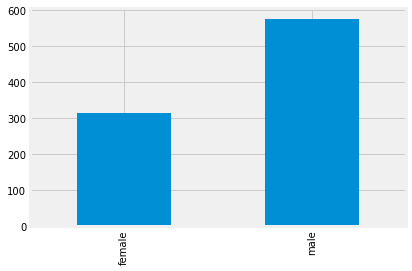

In [16]:
## Write your code here
titanic_modified['Sex'].value_counts().sort_index().plot(kind='bar')

### Answer the question:

__What can you learn from above figure?__ Write your answer below:


### Different classes
Look at the distribution of different classes are also important.

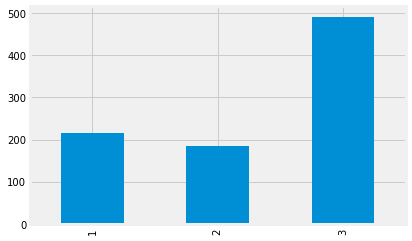

In [17]:
## Write your code here
titanic_modified['Pclass'].value_counts().sort_index().plot(kind='bar')

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

### How is age distributed?

Looking at the age distribution of the passengers may also be useful.

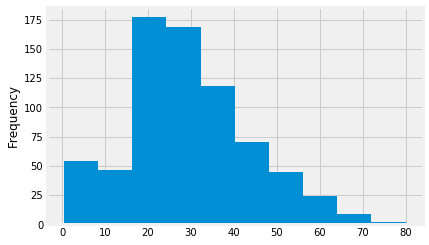

In [18]:
## Write your code here
titanic_modified['Age'].plot(kind='hist',bins=10)

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

### How is fare distributed?

Looking at the fare distribution of the passengers may also be useful.

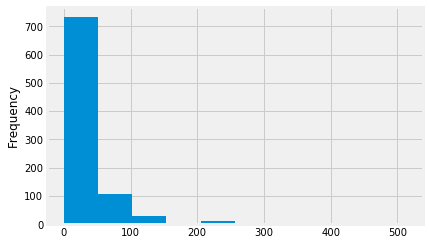

In [19]:
## Write your code here
titanic_modified['Fare'].plot(kind='hist',bins=10)

### Answer the question:

__What can you learn from above figure?__ Write your answer below:

You should ckeck other faetures if you decide to use them in your analysis.

## Step 3: Feature Transformation/Creation

In your analysis, you may need to create some addtional features/columns to further support it. 

Here, we are going to create a few features.

### Creating age group

Grouping age into a categorical feature is always a good strategy to deal with your data. In this analysis, we treat the age grouping use the following logic:

```python
if age < 21:
    'child'
elif age > 60:
    'elder'
else:
    'adult'
```

You should call the new column as `Age_group`.

In [26]:
def age_grp_calc(df):

    if (df['Age'] < 21):
        return 'child'
    elif (df['Age'] > 60):
        return 'elder'
    else:
        return 'adult'

#titanic_modified1 = titanic_modified.copy()
titanic_modified['Age_Group'] = titanic_modified.apply(age_grp_calc, axis = 1)


In [27]:
titanic_modified.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_imputed,Embarked_imputed,Age_Group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.000000,S,adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.000000,C,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.000000,S,adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.000000,S,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.000000,S,adult
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,29.699118,Q,adult
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,54.000000,S,adult
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,2.000000,S,child
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,27.000000,S,adult


### Create family and travel_alone

In this dataset, we have two features modeling _family_: `sibsp` and `parch`. Maybe in the analysis we only care about if the passenger is traveling alone or not.

The logic is as following:
1. we are going to combine `sibsp` and `parch` as a new column `family` - just adding them up;
2. create a new column `travel_alone` with the following logic:
```python 
if family == 0:
    'alone'
else:
    'family'
```
Don't forget to test if the calculation is correct.

In [29]:
## write your code here
titanic_modified['family'] = titanic_modified['SibSp'] + titanic_modified['Parch']

titanic_modified['travel_alone'] = ['alone' if x == 0 else 'family' for x in titanic_modified['family']]
titanic_modified.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_imputed,Embarked_imputed,Age_Group,family,travel_alone
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,S,adult,1,family
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,C,adult,1,family
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,S,adult,0,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,S,adult,1,family
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,S,adult,0,alone


You should create additional features if needed.

## Step 4: Answer Your Analytical Question

Since we have gained enough understanding of the dataset, now we can move forward toward the analytical questions you defined earlier. _Do not hesitate to change your analytical question if needed._

__You should break down this step based on your analytical questions. __

Below is some example I try to answer my example analytical questions.

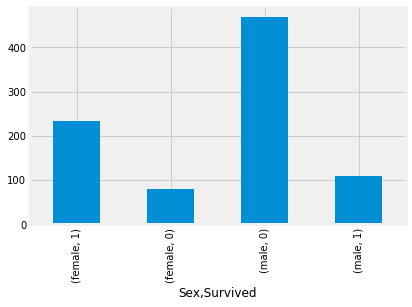

In [33]:
# sex vs. survived
titanic_modified.groupby('Sex')['Survived'].value_counts().plot(kind='bar')

### What can be learned - This is required for all your analytical questions

Based on above visualization, it is clear that the _survival rate_ of _female_ passengers are much higher (>70%). 

Based on the lower visualization, it is clear that in terms of the absolute number, female passengers survived more than male ones, despite the larger number of male passengers on the Titanic.

These findings possibly suggest that the passengers on the Titanic are very __chivalrous__.

### Start Your Own Analysis

Now you can start your own analysis below.

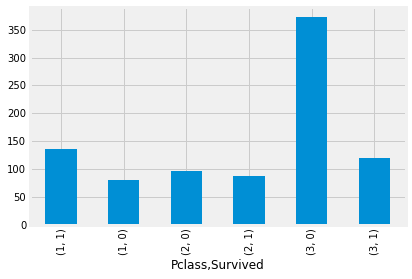

In [40]:
# Pclass vs Survived
titanic_modified.groupby('Pclass')['Survived'].value_counts().plot(kind='bar')

# Looking at the chart below we can say that the survival chances of Pclass = 3 is very low when compared to Pclass = 1 or 2.

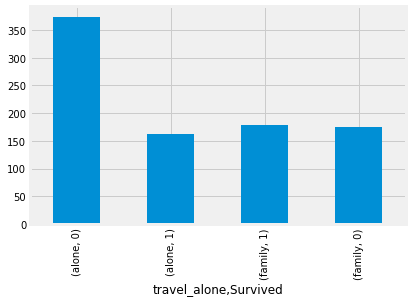

In [43]:
# Travel_Alone vs Survived
titanic_modified.groupby('travel_alone')['Survived'].value_counts().plot(kind='bar')

# The travel_alone column is based on 'sibsp' and 'parch' columns. It gives us the information whether a passenger 
# travelled alone or with 1 or more relatives (family). The bar plot below shows us that the survival rate of a 
# passenger is higher if he/she travelled with family which means that if a passenger is travelling alone his chances of survival are low.

### What can you learn from your analysis, in response toward your analytical question?

Put your analysis here

## Step 5: Next Steps and Wrap Up

In this section, you should discuss the next steps of the analysis. The next steps should be very relevant to the dataset (and your analytical questions), but might not be feasible because of the time/data/technique constraints.

### An Example Next Step

Based on my analytical questions, a natural next step is to analyze how can we use these features (including `Sex`, `Age_group`, ...) to __predict__ whether a passenger would survive or not. This would be the best extension of the analysis I have done so far. However, due to the data limitation (missing a _testing_ dataset to evaluate the predictive model(s)), and the limitations of the predictive modeling techniques (which I will learn in BA 545 next semester), they are not feasible at this point

### Next Steps

Provide your next steps here.

To wrap up, you should provide a few things, including __lessons learned__ and __technical challenges__. These parts are _optional_ in this analysis, but are __required__ in your final project.

- __lessons learned__: these are the generic lessons you have learned in the analysis, such as how to write proper python code (for different analytical purposes), how to write up your analytical results, etc.
- __technocal challenges__: during your analysis, you must have encountered and overcame some technical challenges, such as questions in writing code/handling errors, ...

Writing these two parts would help you further your understanding toward data analysis.

### Wrapping Up

Good job!

In this part, you have completed some _descriptive analyses_ using a famous dataset from scratch. This is a __preview__ of your final project, and you should consider using this notebook as a _template_ for your final project analysis.